In [4]:
import pandas as pd
from matplotlib import pyplot as plt

#turn off warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
suicide_rates_df = pd.read_csv('master.csv')
suicide_rates_df = suicide_rates_df.drop(['country-year', ' gdp_for_year ($) ', 'generation'], axis=1)
suicide_rates_df = suicide_rates_df[suicide_rates_df['year'] == 2020]
suicide_rates_df = suicide_rates_df.dropna()
suicide_rates_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
27823,Australia,2020,male,5-14 years,15.0,25655289,0.058467,0.960859,51692.842750
27824,Austria,2020,male,5-14 years,2.0,8916864,0.022429,0.921971,48586.801320
27834,Costa Rica,2020,male,5-14 years,1.0,5123105,0.019519,0.817895,12140.854150
27838,Czechia,2020,male,5-14 years,3.0,10697858,0.028043,0.896591,22931.274600
27841,Ecuador,2020,male,5-14 years,44.0,17588595,0.250162,0.737612,5600.389615
...,...,...,...,...,...,...,...,...,...
31493,Serbia,2020,female,75+ years,62.0,6899126,0.898665,0.796845,7720.510572
31495,Singapore,2020,female,75+ years,18.0,5685807,0.316578,0.931806,59797.752180
31497,Slovenia,2020,female,75+ years,24.0,2102419,1.141542,0.908508,25517.330670
31499,Spain,2020,female,75+ years,182.0,47365655,0.384245,0.889149,27063.193920


In [6]:
data2 = suicide_rates_df.groupby(['country']).sum()
data2 = pd.DataFrame(data2['suicides_no'])
data2 = data2.reset_index()
data2

,country,suicides_no
0,Australia,3139.0
1,Austria,1072.0
2,Costa Rica,351.0
3,Czechia,1224.0
4,Ecuador,1071.0
5,Estonia,210.0
6,Georgia,202.0
7,Germany,7766.0
8,Guatemala,574.0
9,Iceland,47.0


In [7]:
# Calculate the suicide rates per 100k people using the original DataFrame
suicide_rates_df['suicide_rate_per_100k'] = suicide_rates_df['suicides_no'] / suicide_rates_df['population'] * 100000


In [8]:
# Group the data by country and calculate the mean suicide rate per 100k people
data3 = suicide_rates_df.groupby(['country'])['suicide_rate_per_100k'].mean()
data3 = pd.DataFrame(data3).reset_index()


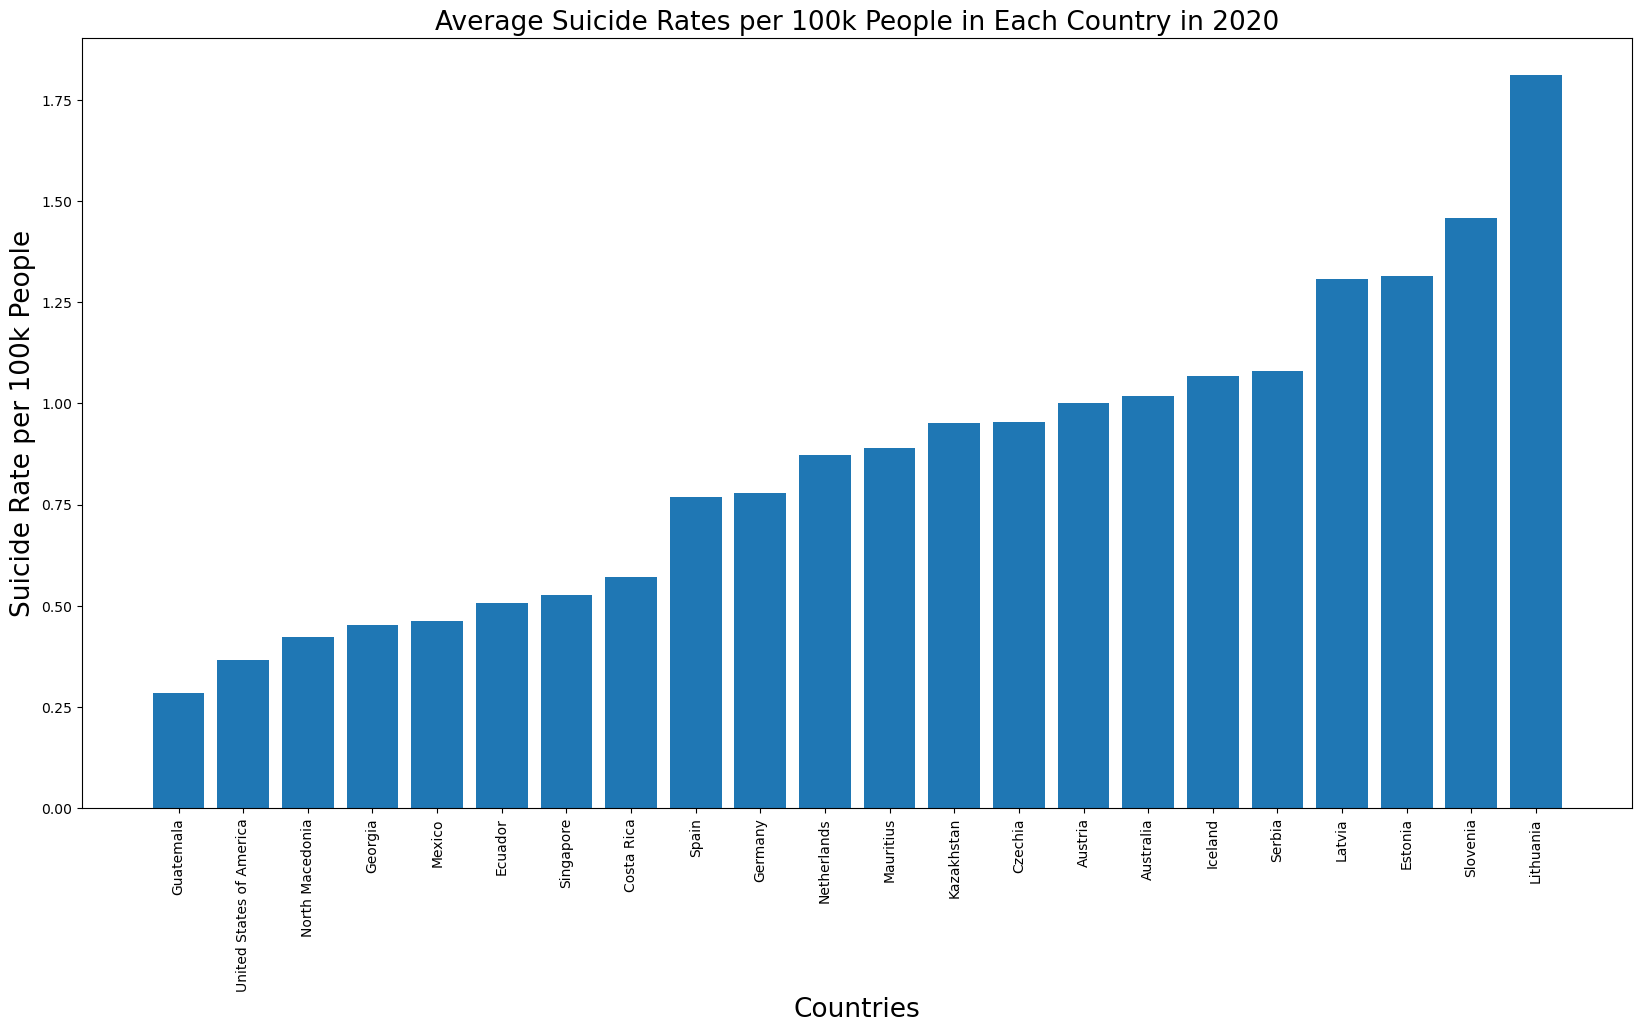

In [21]:
# Sort the data by suicide_rate_per_100k column in ascending order
data3 = data3.sort_values(by='suicide_rate_per_100k', ascending=True)

# Create a bar graph
plt.figure(figsize=(20, 10))
plt.bar(data3['country'], data3['suicide_rate_per_100k'])
plt.xlabel('Countries', fontsize=19)
plt.ylabel('Suicide Rate per 100k People', fontsize=19)
plt.title('Average Suicide Rates per 100k People in Each Country in 2020', fontsize=19)
plt.xticks(rotation=90)
plt.show()


Text(0.5, 1.0, 'Suicide Rates per 100k by Country')

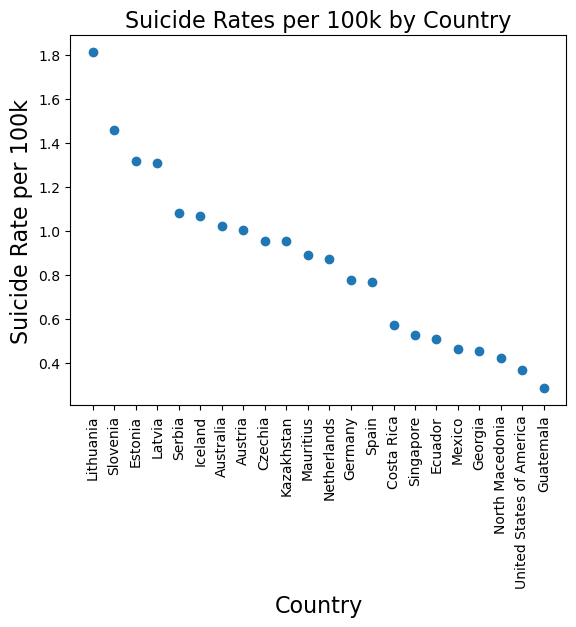

In [13]:
# Group the data by country and calculate the mean suicide rate per 100k people
data3 = suicide_rates_df.groupby(['country'])['suicide_rate_per_100k'].mean().reset_index()

# Sort the data by suicide rate in descending order
data3 = data3.sort_values('suicide_rate_per_100k', ascending=False)

# Create the scatter plot
plt.scatter(data3['country'], data3['suicide_rate_per_100k'])

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set axis labels and title
plt.xlabel('Country', fontsize=16)
plt.ylabel('Suicide Rate per 100k', fontsize=16)
plt.title('Suicide Rates per 100k by Country', fontsize=16)

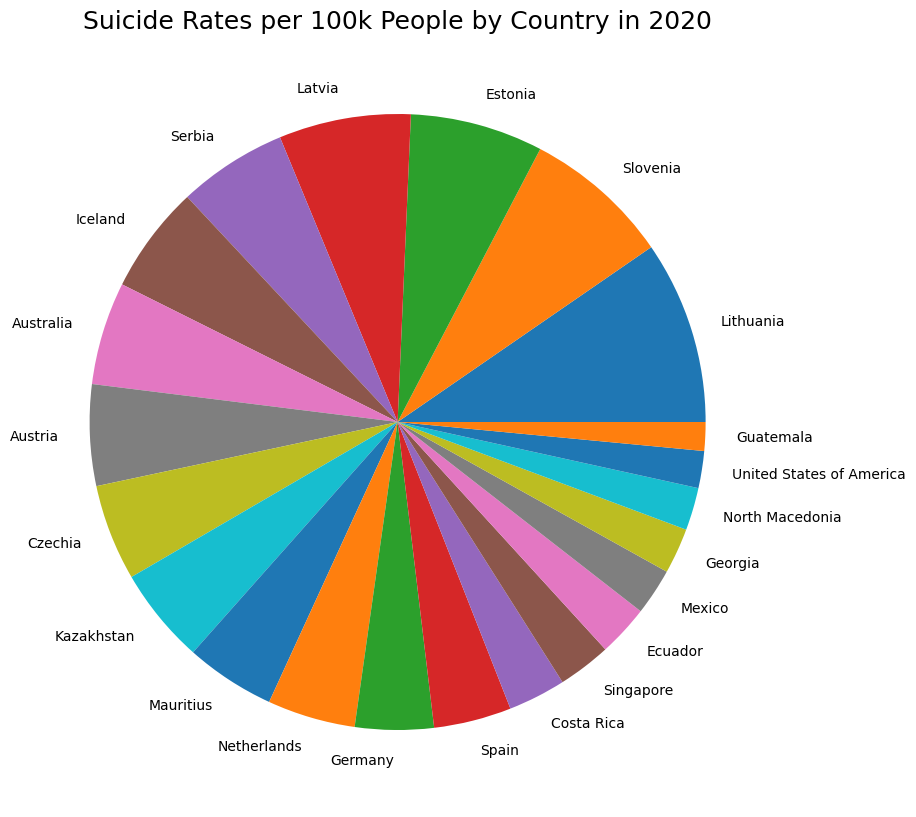

In [19]:
# Set the figure size
plt.figure(figsize=(10,10))

# Get the data
suicide_rates = data3['suicide_rate_per_100k']
countries = data3['country']

# Create the pie chart
plt.pie(suicide_rates, labels=countries)

# Add title
plt.title('Suicide Rates per 100k People by Country in 2020', fontsize=18)

# Show the chart
plt.show()